# Import Modules

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [4]:
path = "../datasets/house_prices/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [5]:
#%%
print(train.head())
train.columns
#%%
print(test.head())
test.columns
#%%
print(train.info())
#%%
print(test.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
#%% Impute values depending category
def impute_smart(df):
    ''':argument: Dataframe
        :return: Dataframe with no NanN values
    '''
    nulls = train.isnull().sum();
    nulls = nulls[nulls > 0]
    for i in nulls.index:
        if df[i].dtype != 'object':
            df[i].replace(np.nan,df[i].mean(),inplace=True)
        else:
            df[i].replace(np.nan, df[i].value_counts().index[0],inplace=True)
    return "Imputed done"

In [7]:
#%%
impute_smart(train)
#%%
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#%%Dummy variables
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [9]:
#%%Split features and variable
X = train_dummies.drop('SalePrice',axis=1)
y = train.SalePrice

In [10]:
#%%Scale data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X)
X_norm = normalizer.transform(X)

In [11]:
X_norm

array([[1.03439176e-04, 6.20635054e-03, 6.72354642e-03, ...,
        0.00000000e+00, 1.03439176e-04, 0.00000000e+00],
       [1.87297217e-04, 1.87297217e-03, 7.49188868e-03, ...,
        0.00000000e+00, 9.36486085e-05, 0.00000000e+00],
       [2.45708706e-04, 4.91417411e-03, 5.56939733e-03, ...,
        0.00000000e+00, 8.19029019e-05, 0.00000000e+00],
       ...,
       [1.35258148e-01, 6.49387540e-03, 6.12279681e-03, ...,
        0.00000000e+00, 9.27696486e-05, 0.00000000e+00],
       [1.34922279e-01, 1.84951719e-03, 6.28835845e-03, ...,
        0.00000000e+00, 9.24758596e-05, 0.00000000e+00],
       [1.31834624e-01, 1.80595375e-03, 6.77232657e-03, ...,
        0.00000000e+00, 9.02976876e-05, 0.00000000e+00]])

In [12]:
#%% Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.7,random_state=2021)

In [13]:
#%%Import Models
from sklearn.linear_model import LinearRegression
lr = LinearRegression(positive=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [14]:
#%%Import scores
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test,y_pred)**(1/2)
print("The MSE for the first model is {}".format(mse))

The MSE for the first model is 48582.98244267599


In [27]:
lr.coef_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.56802127e+05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.77744498e+05, 2.16873454e+05, 0.00000000e+00, 1.77783485e+05,
       2.29823807e+05, 0.00000000e+00, 2.85745077e+05, 2.01033490e+05,
       8.30419816e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.72492475e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.04711628e+07, 0.00000000e+00, 0.00000000e+00, 3.30185386e+04,
       0.00000000e+00, 4.99854144e+05, 0.00000000e+00, 9.10975274e+05,
       2.74724704e+04, 6.57298988e+05, 9.32566442e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.65401932e+07, 5.13828855e+07,
       0.00000000e+00, 2.52050992e+07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.46944711e+07, 0.00000000e+00, 5.49202746e+08,
       3.73443357e+08, 0.00000000e+00, 2.79694169e+07, 7.59725374e+07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

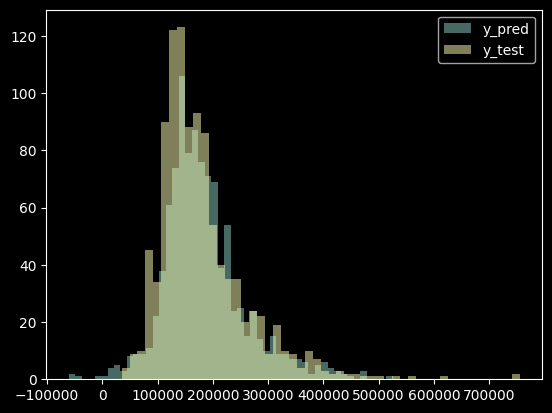

In [26]:
#%%
from matplotlib import  pyplot as plt
plt.hist(y_pred,alpha=0.5,bins=50)
plt.hist(y_test,alpha=0.5,bins=50)
plt.legend(['y_pred','y_test'])
plt.show()
